In [1]:
# Install the required libraries.
!pip install pafy youtube-dl moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.6 MB/s eta 0:00:00


In [ ]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from moviepy.editor import *
%matplotlib inline

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



In [3]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
# Download the UCF50 Dataset
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar

#Extract the Dataset
!unrar x UCF50.rar

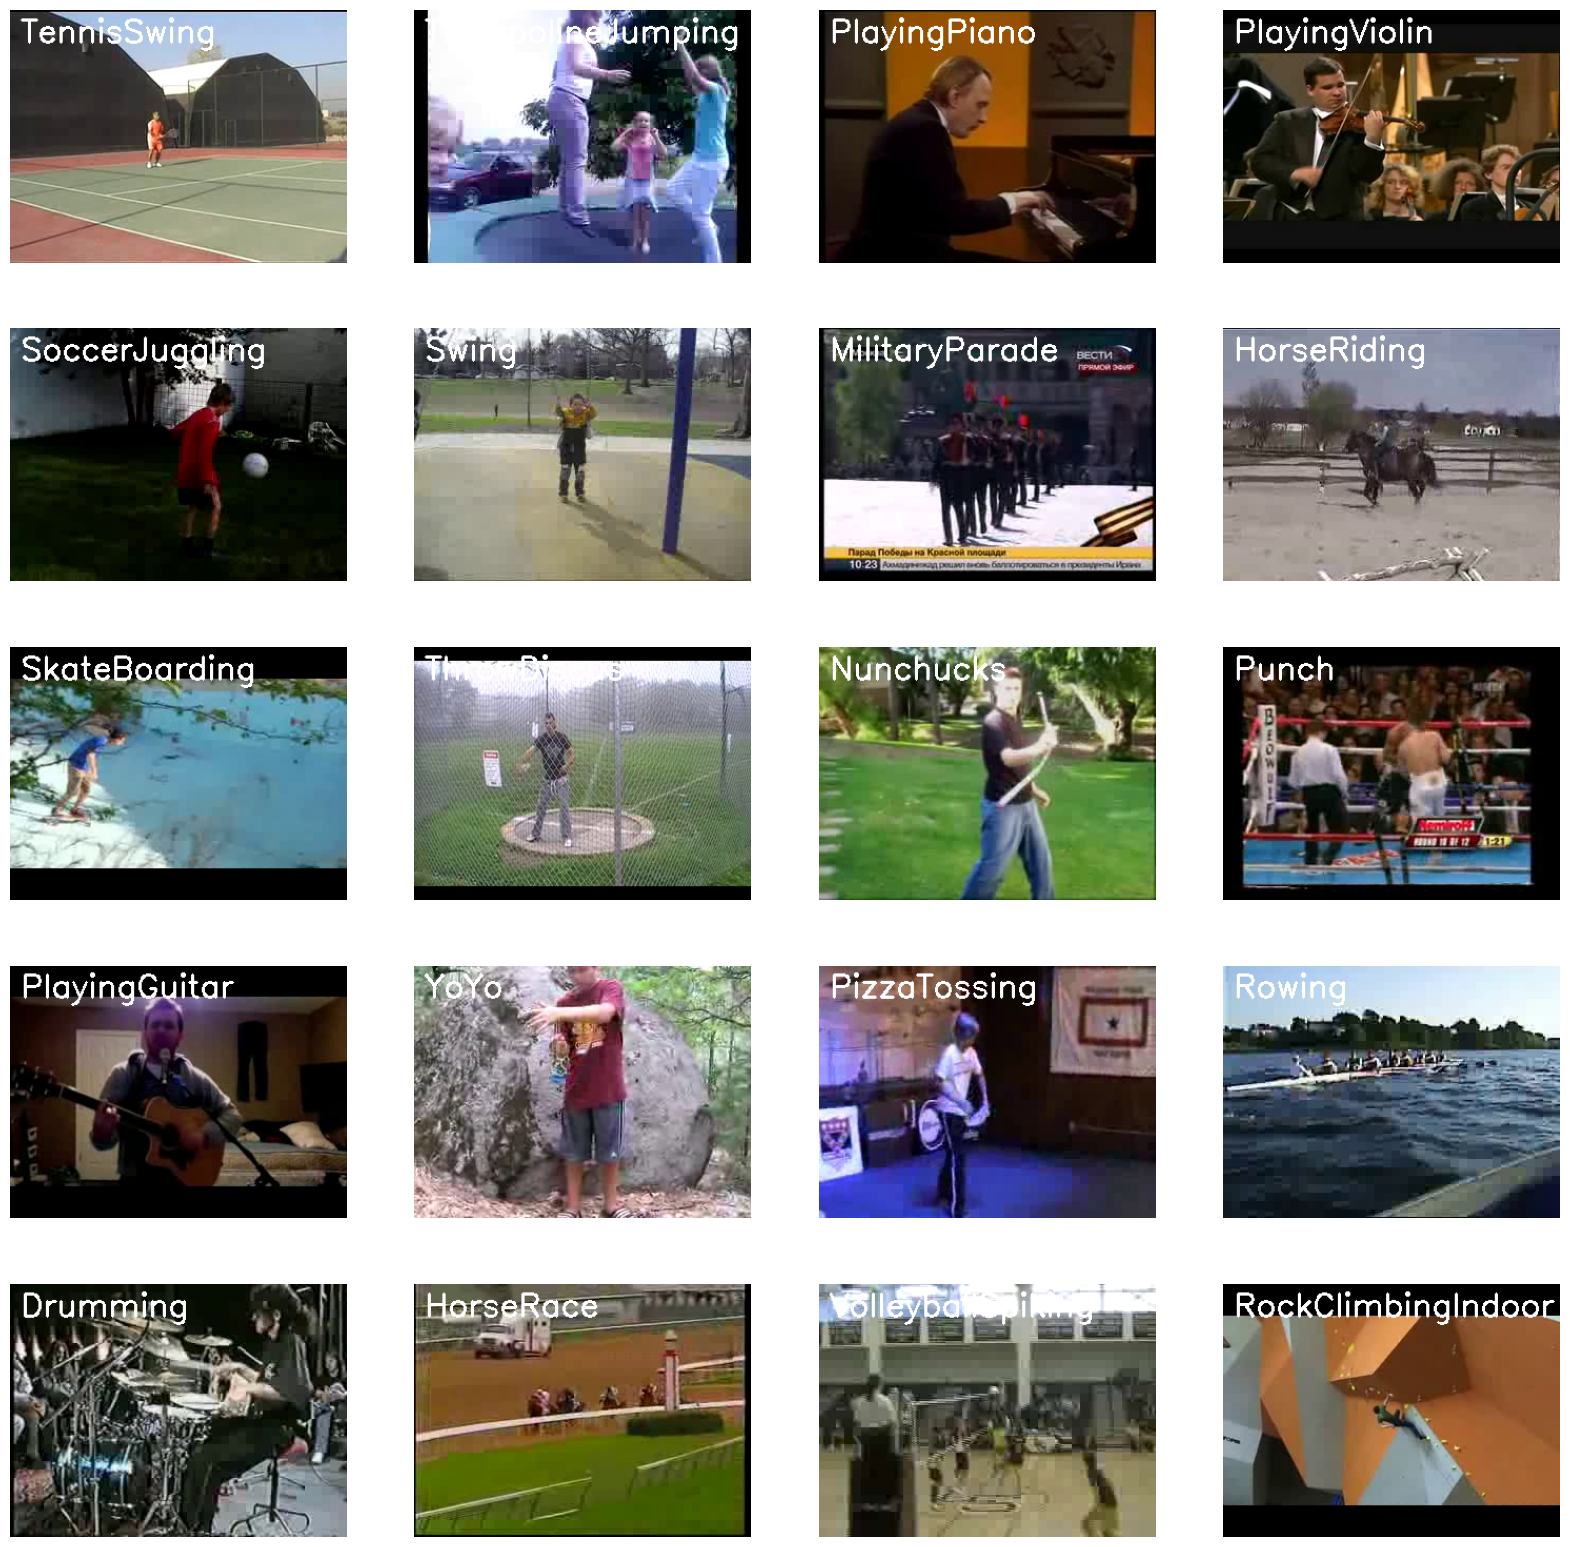

In [5]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('UCF50')

# Generate a list of 20 random values. The values will be between 0-50,
# where 50 is the total number of class in the dataset.
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')

    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object.
    video_reader.release()

    # Convert the frame from BGR into RGB format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [6]:
len(all_classes_names)

50

In [7]:
all_classes_names

['Skijet',
 'RopeClimbing',
 'Biking',
 'PullUps',
 'MilitaryParade',
 'Lunges',
 'PushUps',
 'JumpingJack',
 'Mixing',
 'HighJump',
 'Kayaking',
 'PizzaTossing',
 'Swing',
 'PlayingTabla',
 'JumpRope',
 'Rowing',
 'SkateBoarding',
 'PlayingViolin',
 'SoccerJuggling',
 'TaiChi',
 'BenchPress',
 'Nunchucks',
 'SalsaSpin',
 'PlayingGuitar',
 'Billiards',
 'YoYo',
 'Basketball',
 'PoleVault',
 'Fencing',
 'CleanAndJerk',
 'TrampolineJumping',
 'HorseRace',
 'Diving',
 'GolfSwing',
 'ThrowDiscus',
 'JavelinThrow',
 'HulaHoop',
 'RockClimbingIndoor',
 'WalkingWithDog',
 'BreastStroke',
 'Drumming',
 'TennisSwing',
 'VolleyballSpiking',
 'HorseRiding',
 'PlayingPiano',
 'BaseballPitch',
 'Skiing',
 'JugglingBalls',
 'PommelHorse',
 'Punch']

In [ ]:
# Configure the target dimensions for preprocessing video frames
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

# Define how many consecutive frames from each video will be used as input to create temporal sequences
SEQUENCE_LENGTH = 20

# Set the path to the root directory where the UCF50 action recognition dataset is stored
DATASET_DIR = "UCF50"

# Build a list of action class names for model training - using the first 20 classes from the dataset for quicker training
CLASSES_LIST = []
for i in range(20):
  CLASSES_LIST.append(all_classes_names[i])

In [9]:
import os

# Path to dataset
DATASET_DIR = "UCF50"

# Automatically get class names from folder names
CLASSES_LIST = sorted(CLASSES_LIST)

print("Classes found:", CLASSES_LIST)
print("Total classes:", len(CLASSES_LIST))

Classes found: ['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards', 'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing', 'GolfSwing', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Lunges', 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing', 'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet', 'SoccerJuggling', 'Swing', 'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']
Total classes: 50


In [ ]:
def extract_video_frames(video_path):
    # Initialize an empty list to collect processed frames from the video
    frames_list = []

    # Open the video file for reading frames
    video_reader = cv2.VideoCapture(video_path)

    # Retrieve the total number of frames available in the video
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Determine the interval for frame sampling to evenly select frames across the video
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Loop through the required number of frames for the sequence
    for frame_counter in range(SEQUENCE_LENGTH):
        # Move to the target frame position based on the calculated interval
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Attempt to read the frame at the current position
        success, frame = video_reader.read()

        # If reading fails, exit the loop early to avoid errors
        if not success:
            break

        # Resize the frame to the model's expected input dimensions
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Scale pixel values to the [0, 1] range for normalization
        normalized_frame = resized_frame / 255

        # Add the normalized frame to the list
        frames_list.append(normalized_frame)

    # Close the video file and release resources
    video_reader.release()

    # Return the list of processed frames for further use
    return frames_list

In [ ]:
def build_video_dataset():
    # Initialize lists to store extracted features, corresponding labels, and video file paths
    features = []
    labels = []
    video_files_paths = []

    # Loop through each class in the provided class list
    for class_index, class_name in enumerate(CLASSES_LIST):
        # Print the class name currently being processed for tracking progress
        print(f'Extracting Data of Class: {class_name}')

        # Retrieve all video file names within the current class directory
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Process each video file in the class directory
        for file_name in files_list:
            # Build the full path to the video file
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            # Extract a sequence of frames from the video using the frame extraction utility
            frames = extract_video_frames(video_file_path)

            # Only include videos with the expected number of frames for consistency
            if len(frames) == SEQUENCE_LENGTH:
                # Store the extracted frames, label index, and file path in their respective lists
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Convert lists to numpy arrays for efficient processing and compatibility with ML models
    features = np.asarray(features)
    labels = np.array(labels)

    # Return the dataset: features, labels, and file paths for further use
    return features, labels, video_files_paths


In [ ]:
# Create the dataset.
features, labels, video_files_paths = build_video_dataset()

Extracting Data of Class: BaseballPitch
Extracting Data of Class: Basketball
Extracting Data of Class: BenchPress
Extracting Data of Class: Biking
Extracting Data of Class: Billiards
Extracting Data of Class: BreastStroke
Extracting Data of Class: CleanAndJerk
Extracting Data of Class: Diving
Extracting Data of Class: Drumming
Extracting Data of Class: Fencing
Extracting Data of Class: GolfSwing
Extracting Data of Class: HighJump
Extracting Data of Class: HorseRace
Extracting Data of Class: HorseRiding
Extracting Data of Class: HulaHoop
Extracting Data of Class: JavelinThrow
Extracting Data of Class: JugglingBalls
Extracting Data of Class: JumpRope


In [ ]:
# Transform integer class labels into one-hot encoded format for neural network training (y labels)
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, 
                                                                            shuffle = True, random_state = seed_constant)

In [ ]:
from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, Dropout, Flatten, Dense, TimeDistributed

def build_convlstm_network():
    model = Sequential()

    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(Flatten())

    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))

    model.summary()

    return model


In [ ]:
# Construct the required convlstm model.
convlstm_model = build_convlstm_network()

In [ ]:
# Plot the model.
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)


convlstm_model.compile(loss = 'categorical_crossentropy', 
                       optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4, 
                                                     shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])


In [ ]:
# Evaluate the trained model.
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)